# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

Pour plus de reproductibilité, nous allons télécharger les données sous format csv d'abord puis nous allons lire ce fichier plutôt que l'url directement.

In [3]:
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202321          7  13155     7879   18431      20          12   
1     202320          7   9078     4647   13509      14           7   
2     202319          7   9344     6091   12597      14           9   
3     202318          7  10671     7291   14051      16          11   
4     202317          7   9184     6162   12206      14           9   
5     202316          7  11387     8014   14760      17          12   
6     202315          7  14040     7613   20467      21          11   
7     202314          7  15247    11032   19462      23          17   
8     202313          7  13322     9700   16944      20          15   
9     202312          7  10374     7218   13530      16          11   
10    202311          7   4919     2880    6958       7           4   
11    202310          7   4854     2731    6977       7           4   
12    202309          7   7004     4548    9460      11           7   
13    202308          7   8175     5316   11034      12           8   
14    202307          7   6595     3782    9408      10           6   
15    202306          7   9595     6017   13173      14           9   
16    202305          7   6237     3907    8567       9           5   
17    202304          7   6299     3973    8625       9           6   
18    202303          7   6063     3798    8328       9           6   
19    202302          7   6576     3060   10092      10           5   
20    202301          7   8153     5470   10836      12           8   
21    202252          7   5171     2717    7625       8           4   
22    202251          7   6226     3822    8630       9           5   
23    202250          7   6590     3100   10080      10           5   
24    202249          7   5095     3212    6978       8           5   
25    202248          7   4985     3043    6927       8           5   
26    202247          7   6087     3733    8441       9           5   
27    202246          7   3033     1392    4674       5           3   
28    202245          7   3827     1720    5934       6           3   
29    202244          7   4271     2231    6311       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1665  199126          7  17608    11304   23912      31          20   
1666  199125          7  16169    10700   21638      28          18   
1667  199124          7  16171    10071   22271      28          17   
1668  199123          7  11947     7671   16223      21          13   
1669  199122          7  15452     9953   20951      27          17   
1670  199121          7  14903     8975   20831      26          16   
1671  199120          7  19053    12742   25364      34          23   
1672  199119          7  16739    11246   22232      29          19   
1673  199118          7  21385    13882   28888      38          25   
1674  199117          7  13462     8877   18047      24          16   
1675  199116          7  14857    10068   19646      26          18   
1676  199115          7  13975     9781   18169      25          18   
1677  199114          7  12265     7684   16846      22          14   
1678  199113          7   9567     6041   13093      17          11   
1679  199112          7  10864     7331   14397      19          13   
1680  199111          7  15574    11184   19964      27          19   
1681  199110          7  16643    11372   21914      29          20   
1682  199109          7  13741     8780   18702      24          15   
1683  199108          7  13289     8813   17765      23          15   
1684  199107          7  12337     8077   16597      22          15   
1685  199106          7  10877     7013   14741      19          12   
1686  199105          7  10442     6544   14340      18          11   
1687  199104          7   7913     4563   11263      14           8   
1688  199103          7  15387    10484   20290      27          18   
1689  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non, il n'y a donc rien à enlever pour ça. Nous allons néanmoins créer une copie de données données brutes avant de les modifier/travailler dessus.

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [7]:
data = raw_data.copy()

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [9]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste.

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

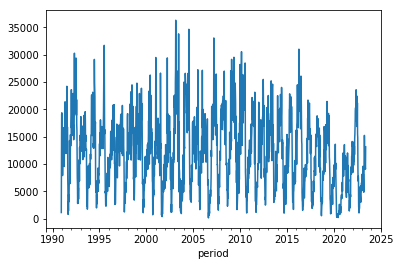

In [12]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en fin d'été.

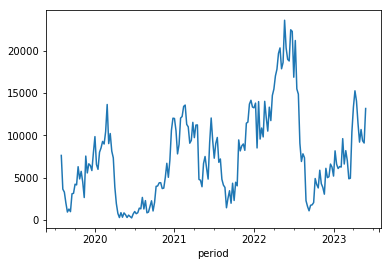

In [13]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de varicelle est très faible en fin d'été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent à la fin de l'année 1990, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [20]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [21]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

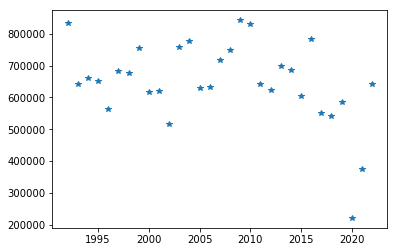

In [22]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement repérer les valeurs les plus élevées (à la fin).

In [23]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre que les épidémies ont une incidence autour de 600 000 et 700 000. Quelques rares épidémies ont une incidence beaucoup plus faible.

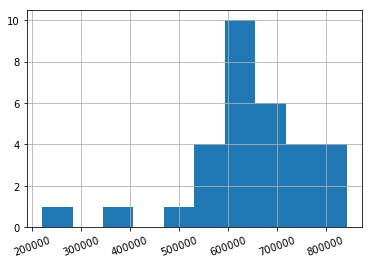

In [24]:
yearly_incidence.hist(xrot=20)